# Team 1 - UFC Fighters


![](https://cdn.vox-cdn.com/thumbor/z_CMbdCm8HZrJh-lKL3GGjSKM-8=/0x0:2440x1627/1200x800/filters:focal(1212x228:1602x618)/cdn.vox-cdn.com/uploads/chorus_image/image/65759283/110_Robbie_Lawler_x_Ben_Askren.0.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rajeevw/ufcdata)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository.
- Submit your works through Google Form (Link on Learning Portal)

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

# Introduction

###  1. What is UFC?
The Ultimate Fighting Championship is a mixed-martial arts promotion in which a series of fights take place around the world.
There are more than 40 events each year.

### 2. What do these datasets contain?
There are 2 datasets. The first one contains basic information of each information such as: Name, Height, Weight, Stance, DOB.
The second dataset is a list of every UFC fight in the history of the organisation. Every row contains information about both fighters, their performance, their basic information and the winner.

### 3. Who is the target audience? 
Our target audience is coach of Danny Castillo - a 27-year-old Orthodox Lightweight fighter. He ased us to make research about every fighters to find strength, weakness of them and try to change these insights to advantages and winning strategy.

### 4. What are big questions?
<!-- How to improve the winning rate of our fighter?
- Which factor has the biggest impact to winning rate of Lightweight class?
- What are the strength and weakness of his opponents?
- Which is the strength and weakness of our fighter? And how to improve?
- Does our fighter need to change class to has higher chance to be champion? -->

Which position is the best position for a win?


# Quick look and clean data

## Import libraries and data
- Mount drive with colab
- Clone the dataset from GitHub
- Import necessary libraries: Pandas, Numpy, Matplotlib.Pyplot, Re


In [0]:
# Start your codes here!
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
! git clone https://github.com/ttanh26/UFC.git

fatal: destination path 'UFC' already exists and is not an empty directory.


In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

## Overview about the datasets



In [0]:
fighters = pd.read_csv('/content/UFC/fighters.csv')
matches = pd.read_csv('/content/UFC/matches.csv')

### I. Fighters dataset

#### 1. Quick look



**Information:** 
- Fighters dataset has 3313 rows with 6 columns.
- All data have object dtype. 
- There are many NaN values in the dataset, with the most missing value column is *Reach*. 
- And there is no duplicate value in this dataset.


In [0]:
fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fighter_name  3313 non-null   object
 1   Height        3050 non-null   object
 2   Weight        3238 non-null   object
 3   Reach         1569 non-null   object
 4   Stance        2439 non-null   object
 5   DOB           2573 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


**Descriptive Statistic**: When all values are object dtypes.
- Most of fighters have the same height or weight.
- 6'0" and 170 lbs are the most common height and weight in UFC.
- There are only 5 stances in UFC now.
- More than 300 fighters have the same DOB with others.

In [0]:
fighters.describe()

,fighter_name,Height,Weight,Reach,Stance,DOB
count,3313,3050,3238,1569,2439,2573
unique,3313,27,108,25,5,2217
top,Seth Petruzelli,"6' 0""",170 lbs.,"72""",Orthodox,"Aug 08, 1988"
freq,1,389,522,159,1913,4


### II. Matches dataset


#### 2. Reshape the DataFrame for easier analyzing


##### 2.1 Split the matches dataset into 2 sub DataFrame: **red** and **blue**
When trying to understand more about this dataset, we splited the dataset into 2 sub table: Red table and blue table. Each table will contains every information of each fighters, except the general information about matches.

In [0]:
red_col = []
blue_col = []
for col in matches.columns:
  if re.findall(r'^R\_.*', col):
    red_col.append(col)
  if re.findall(r'^B\_.*', col):
    blue_col.append(col)

# Here is red table
red = matches[red_col]
red['date'] = matches['date']
red['match_index'] = matches.index
red['corner'] = 'Red'
red['class'] = matches['weight_class']

# Here is blue table
blue = matches[blue_col]
blue['date'] = matches['date']
blue['match_index'] = matches.index
blue['corner'] = 'Blue'
blue['class'] = matches['weight_class']

##### 2.4 Merge into a new one



In [0]:
# Fighters who have NaN values in his/her performance in the past are all new fighters
red[['R_avg_BODY_att', 'R_total_rounds_fought']][red['R_avg_BODY_att'].isna()].sample(10)

,R_avg_BODY_att,R_total_rounds_fought
746,NaN,0.0
4591,NaN,0.0
2647,NaN,0.0
4127,NaN,0.0
4504,NaN,0.0
750,NaN,0.0
274,NaN,0.0
1420,NaN,0.0
2001,NaN,0.0
2138,NaN,0.0


Combine red table and blue table into a new table, which is **fighter_information**

In [0]:
# Remove all the prefix 'R_' in red tables and save as a new list.
l = []
for col in red.columns:
  a = col.replace('R_', '', 1)
  l.append(a)

# Change columns' name of both red and blue tables with the new list.
red.columns = l
blue.columns = l

# Combine 2 table into a new one and drop the old index column
fighter_information = pd.concat([red, blue]).reset_index()
fighter_information.drop('index', axis =1, inplace= True)
fighter_information

,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,date,match_index,corner,class
0,Henry Cejudo,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,32.0,2019-06-08,0,Red,Bantamweight
1,Valentina Shevchenko,0.0,2.0,0.0,12.000000,7.714286,9.285714,6.857143,88.142857,36.142857,18.428571,16.428571,84.571429,37.00,0.000,19.285714,14.714286,1.714286,0.142857,115.857143,59.428571,0.575714,0.428571,5.142857,2.428571,0.601429,161.571429,102.857143,2.0,2.0,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,31.0,2019-06-08,1,Red,Women's Flyweight
2,Tony Ferguson,0.0,11.0,0.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.60,0.200,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,11.0,1.0,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,35.0,2019-06-08,2,Red,Lightweight
3,Jimmie Rivera,1.0,0.0,0.0,18.250000,10.250000,5.875000,4.125000,104.875000,41.000000,1.000000,0.625000,80.500000,24.00,0.375,13.000000,11.500000,0.125000,0.000000,111.750000,45.750000,0.366250,0.000000,2.250000,0.625000,0.103750,117.375000,50.750000,5.0,2.0,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,20.0,690.25,0.0,0.0,1.0,4.0,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,29.0,2019-06-08,3,Red,Bantamweight
4,Tai Tuivasa,1.0,0.0,0.0,7.750000,6.750000,11.000000,7.250000,50.750000,24.750000,0.500000,0.500000,50.750000,22.75,0.500,3.750000,3.000000,0.250000,0.000000,62.250000,32.500000,0.545000,0.000000,0.500000,0.000000,0.000000,63.500000,32.750000,3.0,1.0,6.250000,4.750000,4.500000,3.500000,42.750000,16.250000,7.750000,2.750000,43.250000,14.000000,0.250000,5.500000,3.750000,0.750000,0.000000,55.000000,22.500000,0.397500,0.000000,1.000000,0.000000,0.00

In [0]:
fighter_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10288 entries, 0 to 10287
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fighter                     10288 non-null  object 
 1   current_lose_streak         10288 non-null  float64
 2   current_win_streak          10288 non-null  float64
 3   draw                        10288 non-null  float64
 4   avg_BODY_att                8373 non-null   float64
 5   avg_BODY_landed             8373 non-null   float64
 6   avg_CLINCH_att              8373 non-null   float64
 7   avg_CLINCH_landed           8373 non-null   float64
 8   avg_DISTANCE_att            8373 non-null   float64
 9   avg_DISTANCE_landed         8373 non-null   float64
 10  avg_GROUND_att              8373 non-null   float64
 11  avg_GROUND_landed           8373 non-null   float64
 12  avg_HEAD_att                8373 non-null   float64
 13  avg_HEAD_landed             837

In [0]:
fighter_information = fighter_information[fighter_information['avg_BODY_att'].isna() == False]
fighter_information = fighter_information[fighter_information['age'].isna() == False]
fighter_information = fighter_information[fighter_information['Reach_cms'].isna() == False]
fighter_information = fighter_information[fighter_information['Stance'].isna() == False]

# Some analysis about the Lightweight class <br>


# Analyzing dataset

Which position is the best for winning?

#### List all stats/factor has correlation with the number of win matches


In [0]:
# Based on testing correlation, we could see that avg_HEAD, avg_GROUND, age and total_round_fought(!!!) and avg_time_fought are some variables that have correlation
a = fighter_information.copy()
# a = pd.merge(a, fighter_info, how = 'inner', left_on = 'fighter', right_on = 'fighter')
# a.drop_duplicates('fighter', keep = 'first', inplace = True)

a['avg_sig_str_hit'] = a['avg_SIG_STR_landed'] / a['avg_SIG_STR_att']
a['year'] = pd.to_datetime(a['date']).dt.year
a['avg_time'] = a['total_time_fought(seconds)'] / a['total_rounds_fought']
a['total_match'] = a['wins'] + a['losses'] + a['draw']
a['win_rate'] = a['wins']/ a['total_match']
a['lose_rate'] = a['losses']/ a['total_match']


a = a.drop('date', axis = 1)
a = a.reset_index()
a.drop('index', axis = 1, inplace = True)

# Lightweight

# pd.set_option('display.max_rows', a.shape[0])
# a.corr()['wins'].sort_values(ascending = False)

a

,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,match_index,corner,class,avg_sig_str_hit,year,avg_time,total_match,win_rate,lose_rate
0,Henry Cejudo,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.900000,0.400000,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.600000,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,32.0,0,Red,Bantamweight,0.433925,2019,27.503704,10.0,0.800000,0.200000
1,Valentina Shevchenko,0.0,2.0,0.0,12.000000,7.714286,9.285714,6.857143,88.142857,36.142857,18.428571,16.428571,84.571429,37.000000,0.000000,19.285714,14.714286,1.714286,0.142857,115.857143,59.428571,0.575714,0.428571,5.142857,2.428571,0.601429,161.571429,102.857143,2.0,2.0,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.000000,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,31.0,1,Red,Women's Flyweight,0.512947,2019,42.480000,7.0,0.714286,0.285714
2,Tony Ferguson,0.0,11.0,0.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.600000,0.200000,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,11.0,1.0,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.400000,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,35.0,2,Red,Lightweight,0.446113,2019,18.315152,15.0,0.933333,0.066667
3,Jimmie Rivera,1.0,0.0,0.0,18.250000,10.250000,5.875000,4.125000,104.875000,41.000000,1.000000,0.625000,80.500000,24.000000,0.375000,13.000000,11.500000,0.125000,0.000000,111.750000,45.750000,0.366250,0.000000,2.250000,0.625000,0.103750,117.375000,50.750000,5.0,2.0,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,20.0,690.250000,0.0,0.0,1.0,4.0,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,29.0,3,Red,Bantamweight,0.409396,2019,34.512500,8.0,0.750000,0.250000
4,Tai Tuivasa,1.0,0.0,0.0,7.750000,6.750000,11.000000,7.250000,50.750000,24.750000,0.500000,0.500000,50.750000,22.750000,0.500000,3.750000,3.000000,0.250000,0.000000,62.250000,32.500000,0.545000,0.000000,0.500

### Smth else


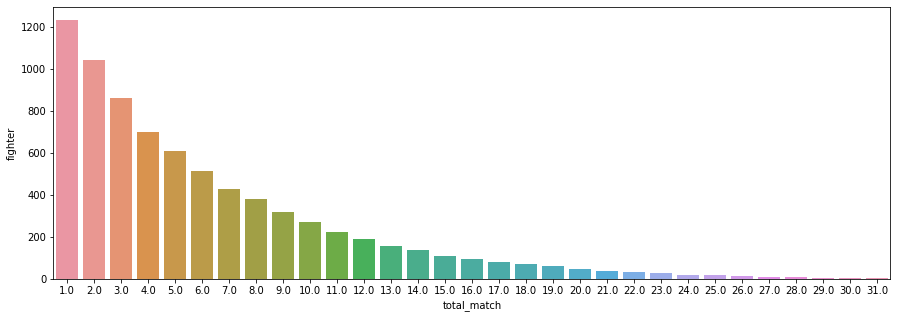

In [0]:
# first thing is quick look of the whole dataset
# a.groupby('class')['avg_GROUND_att'].mean()
b = a.groupby(['total_match', 'class'])['fighter'].count().reset_index()
c = a.groupby('total_match')['fighter'].count().reset_index()
 
plt.subplots(figsize = (15, 5))
sns.barplot(x= 'total_match',
            y = 'fighter',
            data = c)
plt.show()



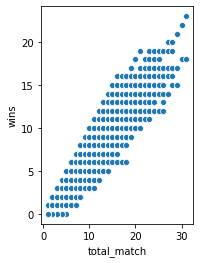

In [0]:
#@title The more you fight, the more you win
b = a[['fighter','total_rounds_fought', 'win_rate', 'lose_rate', 'avg_HEAD_landed', 'wins', 'total_match']].sort_values(by = 'win_rate', ascending = False)

# plt.subplots(1, 2, figsize = (20, 10))
plt.subplot(121)
sns.scatterplot(b['total_match'], b['wins'])


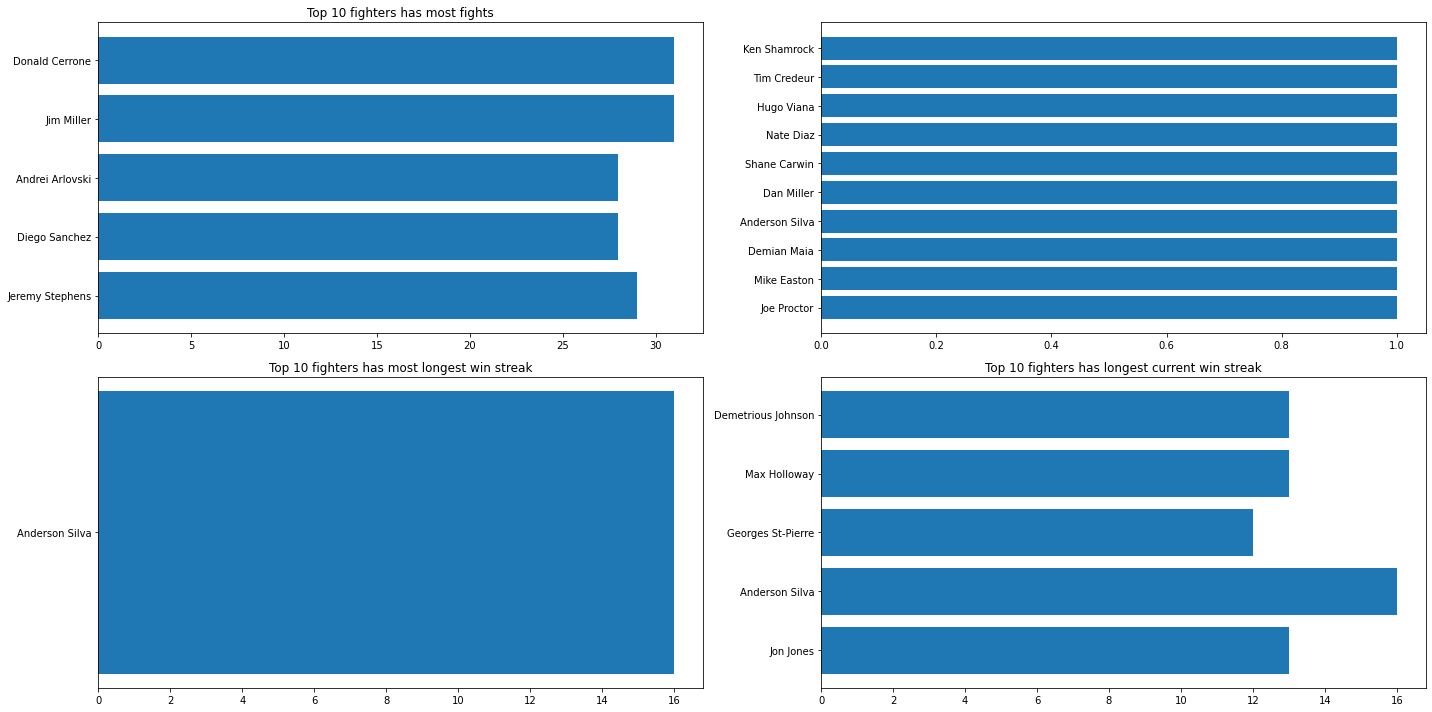

In [0]:
#@title top 10 fighters who has most fight and longest win streak


f = a[['fighter', 'total_match']].sort_values(by = 'total_match', ascending = False).iloc[:10][::-1]
e = a.sort_values(by= 'win_rate').iloc[-10::]
c = a.sort_values(by= 'longest_win_streak', ascending = False).iloc[:10][::-1]
d = a.sort_values(by= 'current_win_streak', ascending = False).iloc[:10][::-1]
fig, ax  = plt.subplots(2, 2, figsize = (20, 10))

plt.subplot(221)
plt.barh(f['fighter'], f['total_match'])
plt.title('Top 10 fighters has most fights')

plt.subplot(222)
# It's so weird with this chart. Because our data is skewed when too many fighters only has 1 fight and they won.
plt.barh(e['fighter'], e['win_rate'])

plt.subplot(223)
plt.barh(c['fighter'], c['longest_win_streak'])
plt.title('Top 10 fighters has most longest win streak')

plt.subplot(224)
plt.barh(d['fighter'], d['current_win_streak'])
plt.title('Top 10 fighters has longest current win streak')

plt.tight_layout()
plt.show()

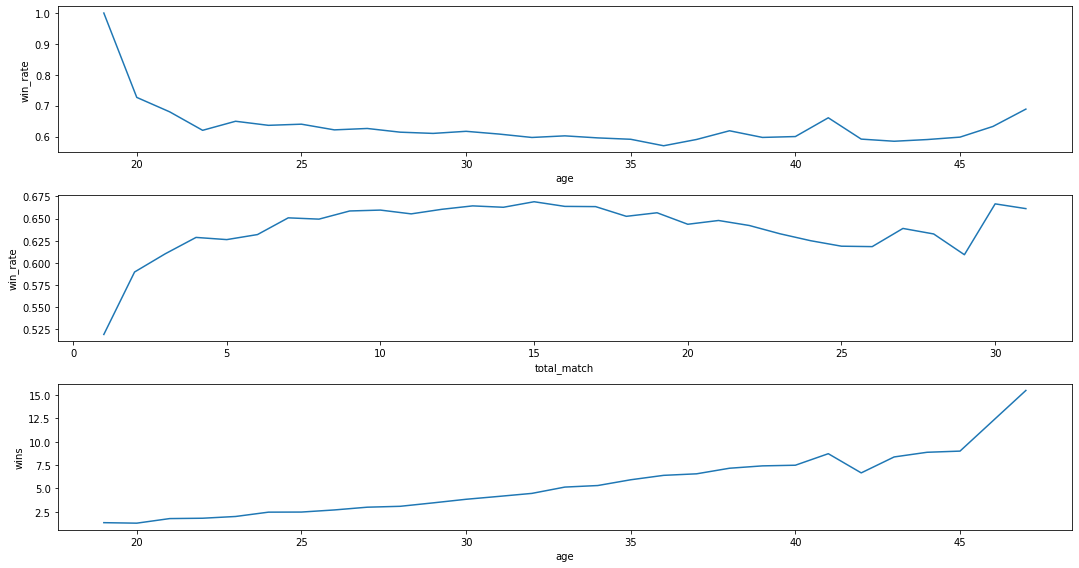

In [0]:
b = a.groupby('age')['win_rate'].mean().reset_index()
d = a.groupby('age')['wins'].mean().reset_index()
# Age seem has weak correlation 
plt.subplots(3, 1, figsize = ( 15, 8))
plt.subplot(311)
sns.lineplot(x = 'age',
            y = 'win_rate',
            data = b)


# Seem like the total match has same pattern with the win rate
c = a.groupby('total_match')['win_rate'].mean().reset_index()
plt.subplot(312)
sns.lineplot(x = 'total_match',
            y = 'win_rate',
            data = c)

plt.subplot(313)
sns.lineplot(x = 'age',
            y = 'wins',
            data = d)

plt.tight_layout()

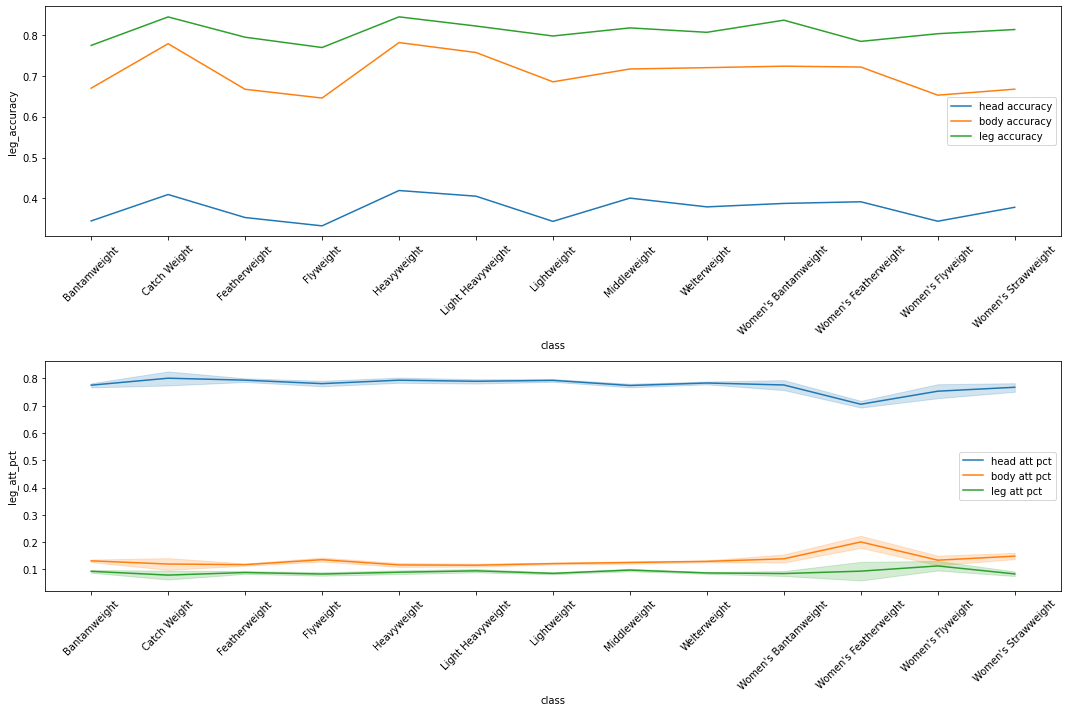

In [115]:
a['head_accuracy'] = a['avg_HEAD_landed'] / a['avg_HEAD_att'] # The accuracy of hit
a['body_accuracy'] = a['avg_BODY_landed'] / a['avg_BODY_att'] # The accuracy of hit
a['leg_accuracy'] = a['avg_LEG_landed'] / a['avg_LEG_att'] # The accuracy of hit

a['head_landed_pct'] = a['avg_HEAD_landed'] / a['avg_SIG_STR_landed'] 
a['body_landed_pct'] = a['avg_BODY_landed'] / a['avg_SIG_STR_landed'] 
a['leg_landed_pct'] = a['avg_LEG_landed'] / a['avg_SIG_STR_landed'] 

a['clinch_accuracy'] = a['avg_CLINCH_landed'] / a['avg_CLINCH_att'] # The accuracy of hit
a['ground_accuracy'] = a['avg_GROUND_landed'] / a['avg_GROUND_att'] # The accuracy of hit
a['distance_accuracy'] = a['avg_DISTANCE_landed'] / a['avg_DISTANCE_att'] # The accuracy of hit

a['clinch_landed_pct'] = a['avg_CLINCH_landed'] / a['avg_SIG_STR_landed'] 
a['ground_landed_pct'] = a['avg_GROUND_landed'] / a['avg_SIG_STR_landed'] 
a['distance_landed_pct'] = a['avg_DISTANCE_landed'] / a['avg_SIG_STR_landed'] 





# sns.scatterplot(x = a['head_accuracy'],
#                 y = a['win_rate'])
b = a.groupby(['class'])[['head_accuracy', 'body_accuracy', 'leg_accuracy']].mean().reset_index()

plt.subplots(2, 1, figsize = (15, 10))
plt.subplot(211)
ax1 = sns.lineplot(b['class'], b['head_accuracy'], label = 'head accuracy')
ax2 = sns.lineplot(b['class'], b['body_accuracy'], label = 'body accuracy')
ax3 = sns.lineplot(b['class'], b['leg_accuracy'], label = 'leg accuracy')
plt.xticks(rotation = 45)

plt.subplot(212)
sns.lineplot(a['class'], a['head_att_pct'], label = 'head att pct')
sns.lineplot(a['class'], a['body_att_pct'], label = 'body att pct')
sns.lineplot(a['class'], a['leg_att_pct'], label = 'leg att pct')
plt.xticks(rotation = 45)
plt.tight_layout()


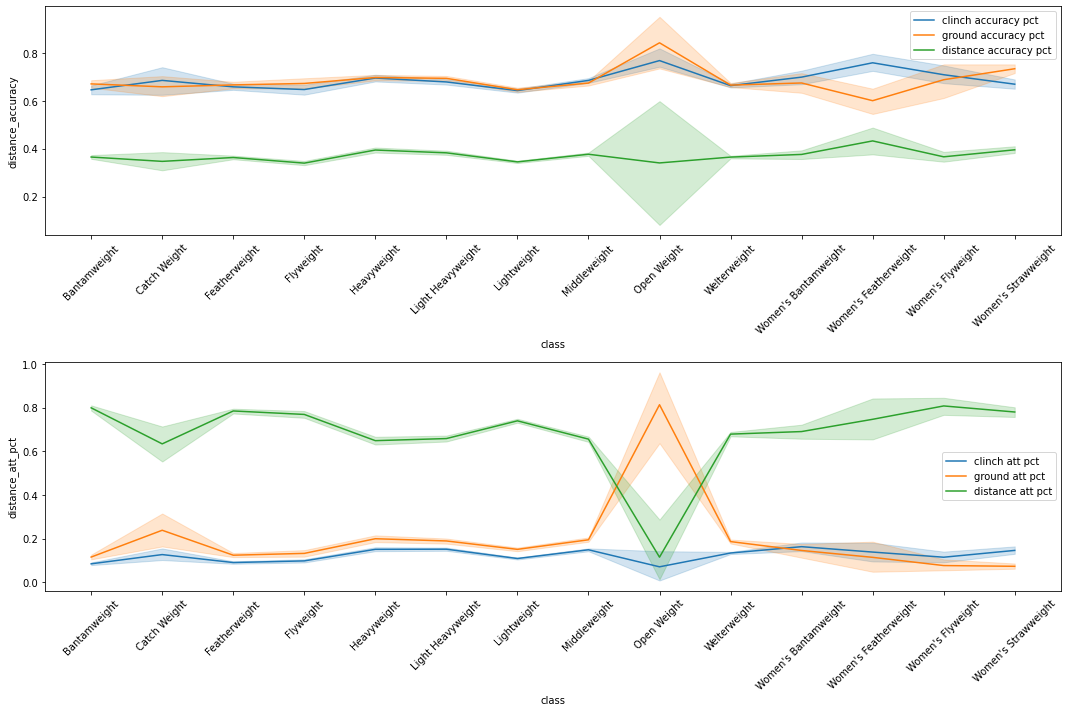

In [0]:
plt.subplots(2, 1, figsize = (15, 10))
plt.subplot(211)
ax1 = sns.lineplot(a['class'], a['clinch_accuracy'], label = 'clinch accuracy pct')
ax2 = sns.lineplot(a['class'], a['ground_accuracy'], label = 'ground accuracy pct')
ax3 = sns.lineplot(a['class'], a['distance_accuracy'], label = 'distance accuracy pct')
plt.xticks(rotation = 45)

plt.subplot(212)
sns.lineplot(a['class'], a['clinch_att_pct'], label = 'clinch att pct')
sns.lineplot(a['class'], a['ground_att_pct'], label = 'ground att pct')
sns.lineplot(a['class'], a['distance_att_pct'], label = 'distance att pct')
plt.xticks(rotation = 45)
plt.tight_layout()

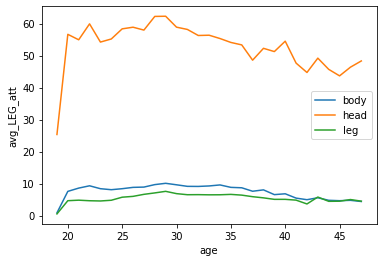

In [0]:
b = a.groupby('age')[['avg_BODY_att', 'avg_HEAD_att', 'avg_LEG_att']].mean().reset_index()

sns.lineplot(b['age'], b['avg_BODY_att'], label = 'body')
sns.lineplot(b['age'], b['avg_HEAD_att'], label = 'head')
sns.lineplot(b['age'], b['avg_LEG_att'], label = 'leg')

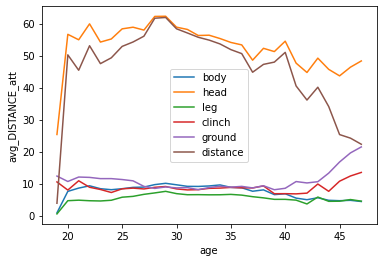

In [0]:
# It seems like different age has differenct fighting style. 
# From age 28, the total hit decreased because of head and distance hit decrease. 
# And from the age of 40, fighters will change from distance hit to ground and clinch hit. 
# But head is still the main way of fighting.
c = a.groupby('age')['avg_BODY_att', 'avg_HEAD_att', 'avg_LEG_att', 'avg_CLINCH_att', 'avg_GROUND_att', 'avg_DISTANCE_att'].mean().reset_index()
sns.lineplot(c['age'], c['avg_BODY_att'], label = 'body')
sns.lineplot(c['age'], c['avg_HEAD_att'], label = 'head')
sns.lineplot(c['age'], c['avg_LEG_att'], label = 'leg')
sns.lineplot(c['age'], c['avg_CLINCH_att'], label = 'clinch')
sns.lineplot(c['age'], c['avg_GROUND_att'], label = 'ground')
sns.lineplot(c['age'], c['avg_DISTANCE_att'], label = 'distance')



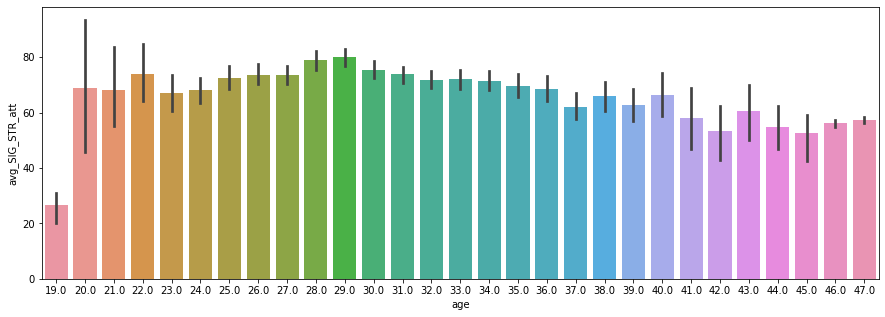

In [0]:
# the number of hit increase significantly before 20 and fluctuated around 70 - 75 hit per match until age 29. 
# From age of 30, the number of hit decrease continuously over year.
a.groupby('age')['avg_SIG_STR_att'].mean().reset_index()

plt.subplots(figsize = (15, 5))
sns.barplot(a['age'], a['avg_SIG_STR_att'])

age        2
fighter    2
dtype: int64

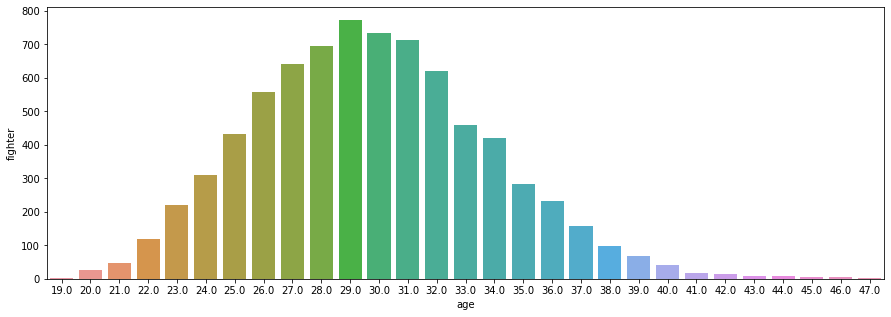

In [0]:
b = a.groupby('age')['fighter'].count().reset_index()
plt.subplots(figsize = (15, 5))
sns.barplot(b['age'], b['fighter'])
b[b['age'] >45].count()

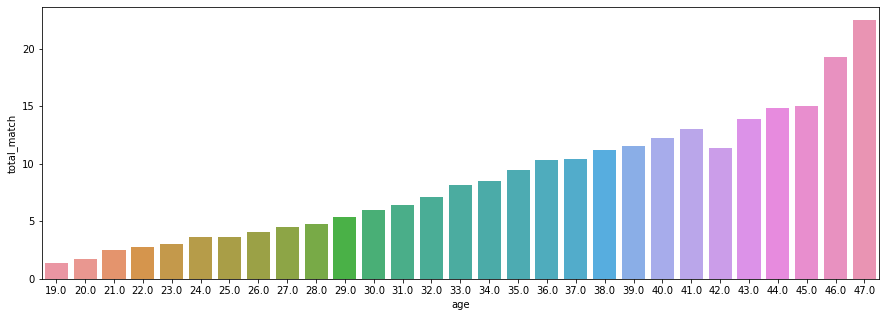

In [0]:
b = a.groupby('age')['total_match'].mean().reset_index()
plt.subplots(figsize = (15, 5))
sns.barplot(b['age'], b['total_match'])

In [116]:
a = a[a['avg_TOTAL_STR_att'] != 0]
a = a[a['class'] != 'Open Weight']
a.fillna(0, inplace = True)
b = a[a.columns[-12:]]
b.insert(loc = 0, column= 'fighter', value = a['fighter'])
b.insert(loc = 1, column = 'year', value = a['year'])
a[a['class'] == 'Catch Weight']

,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,...,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,match_index,corner,class,avg_sig_str_hit,year,avg_time,total_match,win_rate,lose_rate,head_accuracy,body_accuracy,leg_accuracy,head_att_pct,body_att_pct,leg_att_pct,clinch_accuracy,ground_accuracy,distance_accuracy,clinch_att_pct,ground_att_pct,distance_att_pct,gender,head_landed_pct,body_landed_pct,leg_landed_pct,clinch_landed_pct,ground_landed_pct,distance_landed_pct
680,Alexander Volkanovski,0.0,2.0,0.0,8.000000,5.500000,11.500000,10.500000,50.000000,24.000000,46.000000,34.000000,84.000000,51.000000,0.500000,15.500000,12.000000,0.500000,0.500000,107.500000,68.500000,0.635000,0.000000,5.000000,3.500000,0.785000,113.000000,74.000000,2.0,0.0,4.500000,2.000000,3.500000,1.500000,75.000000,22.500000,1.000000,1.000000,72.500000,20.500000,...,0.0,0.0,1.0,1.0,0.0,0.0,2.0,Orthodox,167.64,180.34,145.0,29.0,772,Red,Catch Weight,0.637209,2017,132.600000,2.0,1.000000,0.000000,0.607143,0.687500,0.774194,0.781395,0.074419,0.144186,0.913043,0.739130,0.480000,0.106977,0.427907,0.465116,Men,0.744526,0.080292,0.175182,0.153285,0.496350,0.350365
790,Aljamain Sterling,0.0,1.0,0.0,23.285714,17.142857,13.571429,10.571429,68.714286,24.428571,17.571429,12.142857,61.142857,19.857143,0.000000,15.428571,10.142857,1.571429,0.000000,99.857143,47.142857,0.487143,1.000000,5.428571,2.142857,0.494286,141.714286,86.428571,4.0,2.0,8.857143,4.571429,5.571429,3.428571,48.857143,14.285714,1.000000,0.571429,39.142857,8.285714,...,0.0,0.0,2.0,1.0,2.0,0.0,5.0,Orthodox,170.18,180.34,135.0,27.0,899,Red,Catch Weight,0.472103,2017,40.850000,7.0,0.714286,0.285714,0.324766,0.736196,0.657407,0.612303,0.233190,0.154506,0.778947,0.691057,0.355509,0.135908,0.175966,0.688126,Men,0.421212,0.363636,0.215152,0.224242,0.257576,0.518182
938,Brad Pickett,2.0,0.0,0.0,9.538462,4.846154,6.923077,4.230769,87.692308,24.076923,7.076923,3.538462,82.000000,20.153846,0.230769,10.153846,6.846154,1.000000,0.153846,101.692308,31.846154,0.305385,0.153846,3.692308,1.461538,0.360769,117.923077,46.538462,2.0,8.0,11.307692,6.384615,7.461538,4.923077,101.384615,40.230769,7.692308,5.692308,101.153846,40.846154,...,0.0,2.0,1.0,1.0,1.0,0.0,5.0,Orthodox,167.64,172.72,135.0,38.0,1059,Red,Catch Weight,0.313162,2017,21.243590,13.0,0.384615,0.615385,0.245779,0.508065,0.674242,0.806354,0.093797,0.099849,0.611111,0.500000,0.274561,0.068079,0.069592,0.862330,Men,0.632850,0.152174,0.214976,0.132850,0.111111,0.756039
1121,Jim Miller,0.0,2.0,0.0,8.375000,5.625000,8.833333,5.166667,55.791667,18.333333,7.833333,4.791667,57.750000,17.541667,0.125000,6.333333,5.125000,1.416667,0.208333,72.458333,28.291667,0.361250,1.458333,2.666667,1.125000,0.424583,88.333333,42.416667,7.0,8.0,9.041667,5.958333,6.833333,4.416667,53.708333,16.250000,7.625000,4.875000,55.958333,17.208333,...,0.0,2.0,5.0,3.0,6.0,0.0,16.0,Southpaw,172.72,180.34,155.0,33.0,1254,Red,Catch Weight,0.390454,2016,11.289435,24.0,0.666667,0.333333,0.303752,0.671642,0.809211,0.797010,0.115584,0.087407,0.584906,0.611702,0.328603,0.121909,0.108108,0.769983,Men,0.620029,0.198822,0.181149,0.182622,0.169367,0.648012
1128,Marco Beltran,0.0,3.0,0.0,10.666667,6.666667,12.666667,9.333333,43.666667,11.666667,10.333333,6.000000,51.666667,16.666667,0.333333,4.333333,3.666667,1.

In [0]:
# Sort value to get performance of top 5 fighters have most wins
a.sort_values('wins', ascending = False).drop_duplicates('fighter', keep = 'first').iloc[:5][['fighter', 'wins', 'avg_HEAD_landed', 'avg_BODY_landed', 'avg_LEG_landed', 'avg_opp_HEAD_landed', 'avg_opp_BODY_landed', 'avg_opp_LEG_landed']]

,fighter,wins,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_opp_HEAD_landed,avg_opp_BODY_landed,avg_opp_LEG_landed
4226,Donald Cerrone,23.0,23.258065,11.322581,12.193548,25.483871,11.870968,7.483871
669,Michael Bisping,20.0,40.250000,6.928571,8.535714,20.714286,6.428571,8.035714
470,Demian Maia,19.0,18.296296,3.037037,1.444444,14.925926,3.222222,5.444444
4827,Georges St-Pierre,19.0,38.523810,11.428571,9.761905,12.809524,5.380952,4.142857
3218,Matt Hughes,18.0,15.130435,5.043478,2.173913,7.217391,2.608696,1.173913


In [0]:
# Sort value to get performance of top 5 fighters have most losses
a.sort_values('losses', ascending = False).drop_duplicates('fighter', keep = 'first').iloc[:5][['fighter', 'losses', 'avg_HEAD_landed', 'avg_BODY_landed', 'avg_LEG_landed', 'avg_opp_HEAD_landed', 'avg_opp_BODY_landed', 'avg_opp_LEG_landed']]

,fighter,losses,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_opp_HEAD_landed,avg_opp_BODY_landed,avg_opp_LEG_landed
135,Jeremy Stephens,14.0,22.448276,6.379310,8.620690,19.896552,5.931034,7.551724
43,BJ Penn,14.0,27.961538,5.923077,2.076923,28.500000,8.807692,7.269231
65,Jim Miller,13.0,16.903226,6.032258,5.645161,19.935484,6.935484,2.741935
95,Ross Pearson,13.0,23.480000,12.400000,8.200000,30.880000,9.560000,8.080000
567,Joshua Burkman,12.0,14.388889,5.055556,10.500000,21.888889,7.222222,5.611111


In [0]:
# Sort value to get the total sig strike of top 5 fighters have most wins
a.sort_values('wins', ascending = False).drop_duplicates('fighter', keep = 'first').iloc[:5][['fighter', 'avg_SIG_STR_landed', 'avg_opp_SIG_STR_landed']]

,fighter,avg_SIG_STR_landed,avg_opp_SIG_STR_landed
4226,Donald Cerrone,46.774194,44.838710
669,Michael Bisping,55.714286,35.178571
470,Demian Maia,22.777778,23.592593
4827,Georges St-Pierre,59.714286,22.333333
3218,Matt Hughes,22.347826,11.000000


In [0]:
# Sort value to get the total sig strike of top 5 fighters have most losses
a.sort_values('losses', ascending = False).drop_duplicates('fighter', keep = 'first').iloc[:5][['fighter', 'avg_SIG_STR_landed', 'avg_opp_SIG_STR_landed']]

,fighter,avg_SIG_STR_landed,avg_opp_SIG_STR_landed
135,Jeremy Stephens,37.448276,33.379310
43,BJ Penn,35.961538,44.576923
65,Jim Miller,28.580645,29.612903
95,Ross Pearson,44.080000,48.520000
567,Joshua Burkman,29.944444,34.722222


790

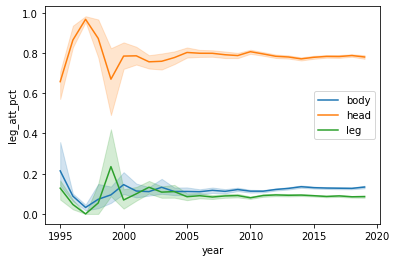

In [0]:
b = a[a.columns[-12:]]
b.insert(loc = 0, column= 'year', value = a['year'])
b.insert(loc = 1, column = 'age', value = a['age'])

sns.lineplot(x = b['year'], y = b['body_att_pct'], label = 'body')
sns.lineplot(x = b['year'], y = b['head_att_pct'], label = 'head')
sns.lineplot(x = b['year'], y = b['leg_att_pct'], label = 'leg')

a[a['year'] == 2018]['fighter'].count()


In [117]:
a.groupby(['class', 'wins'])['Weight_lbs'].mean().reset_index()
a1 = a.drop_duplicates('fighter', keep = 'first')

women = a[a['class'].str.contains('Women')]
men = a[a['class'].str.contains('Women') == False]
men

,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,...,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,match_index,corner,class,avg_sig_str_hit,year,avg_time,total_match,win_rate,lose_rate,head_accuracy,body_accuracy,leg_accuracy,head_att_pct,body_att_pct,leg_att_pct,clinch_accuracy,ground_accuracy,distance_accuracy,clinch_att_pct,ground_att_pct,distance_att_pct,gender,head_landed_pct,body_landed_pct,leg_landed_pct,clinch_landed_pct,ground_landed_pct,distance_landed_pct
0,Henry Cejudo,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.900000,0.400000,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,...,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,32.0,0,Red,Bantamweight,0.433925,2019,27.503704,10.0,0.800000,0.200000,0.322102,0.748858,0.698113,0.731755,0.215976,0.052268,0.647059,0.691489,0.353333,0.167653,0.092702,0.739645,Men,0.543182,0.372727,0.084091,0.250000,0.147727,0.602273
2,Tony Ferguson,0.0,11.0,0.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.600000,0.200000,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,11.0,1.0,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,...,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,35.0,2,Red,Lightweight,0.446113,2019,18.315152,15.0,0.933333,0.066667,0.368022,0.625000,0.815534,0.778016,0.111528,0.110456,0.604651,0.800000,0.425947,0.023056,0.042895,0.934048,Men,0.641827,0.156250,0.201923,0.031250,0.076923,0.891827
3,Jimmie Rivera,1.0,0.0,0.0,18.250000,10.250000,5.875000,4.125000,104.875000,41.000000,1.000000,0.625000,80.500000,24.000000,0.375000,13.000000,11.500000,0.125000,0.000000,111.750000,45.750000,0.366250,0.000000,2.250000,0.625000,0.103750,117.375000,50.750000,5.0,2.0,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,...,0.0,1.0,4.0,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,29.0,3,Red,Bantamweight,0.409396,2019,34.512500,8.0,0.750000,0.250000,0.298137,0.561644,0.884615,0.720358,0.163311,0.116331,0.702128,0.625000,0.390942,0.052573,0.008949,0.938479,Men,0.524590,0.224044,0.251366,0.090164,0.013661,0.896175
4,Tai Tuivasa,1.0,0.0,0.0,7.750000,6.750000,11.000000,7.250000,50.750000,24.750000,0.500000,0.500000,50.750000,22.750000,0.500000,3.750000,3.000000,0.250000,0.000000,62.250000,32.500000,0.545000,0.000000,0.500000,0.000000,0.000000,63.500000,32.750000,3.0,1.0,6.250000,4.750000,4.500000,3.500000,42.750000,16.250000,7.750000,2.750000,43.250000,14.000000,...,0.0,0.0,1.0,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,26.0,4,Red,Heavyweight,0.522088,2019,62.964286,4.0,0.750000,0.250000,0.448276,0.870968,0.800000,0.815261,0.124498,0.060241,0.659091,1.000000,0.487685,0.176707,0.008032,0.815261,Men,0.700000,0.207692,0.092308,0.223077,0.015385,0.761538
5,Aljamain Sterling,0.0,3.0,0.0,25.166667,18.250000,14.000000,11.083333,72.583333,29.416667,16.083333,11.750000,63.000000,23.333333,0.000000,14.500000,10.666667,1.500000,0.083333,102.66

In [0]:
matches['country'] = matches['location'].str.split(', ').str[-1]
matches

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,...,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,country
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,...,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0,USA
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,10.200000,0.800000,0.000000,138.90,51.300000,0.399000,0.700000,1.00000,0.500000,0.225000,158.700000,69.600000,3.0,6.0,13.000000,9.300000,...,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0,USA
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.0,12.193548,0.935484,0.096774,97.00,46.774194,0.496129,0.354839,2.16129,0.677419,0.295484,103.709677,52.548387,8.0,8.0,17.903226,11.870968,...,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0,USA
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,116.250000,53.750000,0.500000,3.0,2.500000,0.500000,0.250000,136.25,70.250000,0.550000,0.250000,2.50000,1.250000,0.287500,154.750000,86.750000,4.0,0.0,12.250000,6.000000,...,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,20.0,690.2

In [0]:
a['gender'] = a['class'].apply(lambda x: 'Women' if 'Women' in x else 'Men')
a1['gender'] = a1['class'].apply(lambda x: 'Women' if 'Women' in x else 'Men')

In [0]:
a1['win-lose'] =a1['wins'] - a1['losses']
a2 = a1.sort_values(by = 'win-lose', ascending = False).head()


In [130]:
import math
a2['difference_sig_str'] = a2['avg_SIG_STR_landed'] - a2['avg_opp_SIG_STR_landed']

df = a2.corr()

x = 'avg_HEAD_landed'
y = 'avg_GROUND_landed'

z = 'win-lose'

xy = df.loc[x, y]
xz = df.loc[x, z]
yz = df.loc[y, z]

Rxyz = math.sqrt((abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2)) )

R2 = Rxyz**2
n = len(df) # Number of rows
k = 2       # Number of independent variables
R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )


[0.8766311352807779, 0.8739197316605751]

In [125]:
a1['class'].unique()

array(['Bantamweight', "Women's Flyweight", 'Lightweight', 'Heavyweight',
       "Women's Strawweight", 'Featherweight', 'Middleweight',
       'Light Heavyweight', "Women's Bantamweight", 'Welterweight',
       "Women's Featherweight", 'Flyweight', 'Catch Weight'], dtype=object)

In [135]:
df.loc[['win-lose']]

,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,...,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms,Reach_cms,Weight_lbs,age,match_index,avg_sig_str_hit,year,avg_time,total_match,win_rate,lose_rate,head_accuracy,body_accuracy,leg_accuracy,head_att_pct,body_att_pct,leg_att_pct,clinch_accuracy,ground_accuracy,distance_accuracy,clinch_att_pct,ground_att_pct,distance_att_pct,head_landed_pct,body_landed_pct,leg_landed_pct,clinch_landed_pct,ground_landed_pct,distance_landed_pct,win-lose,difference_sig_str
win-lose,NaN,-0.493007,NaN,-0.522044,-0.396628,-0.292784,-0.289764,-0.652897,-0.599822,0.932389,0.925866,-0.474265,-0.273223,0.416025,0.178893,0.148278,0.626225,0.304578,-0.57481,-0.413465,0.715899,0.372928,0.346186,0.485011,0.888856,-0.146496,0.386494,-0.322749,0.0,-0.858824,-0.722308,-0.01844,-0.073486,-0.6254,-0.6646,-0.192296,-0.241943,-0.593479,-0.642252,-0.039577,...,0.210277,0.626957,NaN,-0.395285,0.828177,0.153574,-0.377964,-0.645497,0.894427,0.492198,0.630061,0.802955,0.123466,0.77907,0.659689,-0.745698,-0.696444,0.707107,0.198018,-0.198018,0.91601,0.447153,-0.379362,-0.155656,-0.105442,0.325028,0.392867,-0.77349,0.728538,-0.161734,0.949634,-0.674142,-0.01648,-0.21598,0.206352,-0.21213,0.937462,-0.581068,1.0,0.516384


In [128]:
def hihi(a):
  a = str(a)
  if 'Strawweight' in a:
    return '115 lbs'
  elif 'Flyweight' in a:
    return '125 lbs'
  elif 'Bantamweight' in a:
    return '135 lbs'
  elif 'Featherweight' in a:
    return '145 lbs'
  elif 'Lightweight' in a:
    return '155 lbs'
  elif 'Welterweight' in a:
    return '170 lbs'
  elif 'Middleweight' in a:
    return '185 lbs'
  elif 'Light Heavyweight' in a:
    return '205 lbs'
  elif 'Heavyweight' in a:
    return '265 lbs'
  else:
    return 'No limit'

a1['weight_limit'] = a1['class'].apply(hihi)  

a1

,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,...,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,match_index,corner,class,avg_sig_str_hit,year,avg_time,total_match,win_rate,lose_rate,head_accuracy,body_accuracy,leg_accuracy,head_att_pct,body_att_pct,leg_att_pct,clinch_accuracy,ground_accuracy,distance_accuracy,clinch_att_pct,ground_att_pct,distance_att_pct,gender,head_landed_pct,body_landed_pct,leg_landed_pct,clinch_landed_pct,ground_landed_pct,distance_landed_pct,win-lose,weight_limit
0,Henry Cejudo,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.900000,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,...,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,32.0,0,Red,Bantamweight,0.433925,2019,27.503704,10.0,0.800000,0.200000,0.322102,0.748858,0.698113,0.731755,0.215976,0.052268,0.647059,0.691489,0.353333,0.167653,0.092702,0.739645,Men,0.543182,0.372727,0.084091,0.250000,0.147727,0.602273,6.0,135 lbs
1,Valentina Shevchenko,0.0,2.0,0.0,12.000000,7.714286,9.285714,6.857143,88.142857,36.142857,18.428571,16.428571,84.571429,37.000000,0.000,19.285714,14.714286,1.714286,0.142857,115.857143,59.428571,0.575714,0.428571,5.142857,2.428571,0.601429,161.571429,102.857143,2.0,2.0,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,...,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,31.0,1,Red,Women's Flyweight,0.512947,2019,42.480000,7.0,0.714286,0.285714,0.437500,0.642857,0.762963,0.729963,0.103576,0.166461,0.738462,0.891473,0.410049,0.080148,0.159063,0.760789,Women,0.622596,0.129808,0.247596,0.115385,0.276442,0.608173,3.0,125 lbs
2,Tony Ferguson,0.0,11.0,0.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.600000,0.200,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,11.0,1.0,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,...,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,35.0,2,Red,Lightweight,0.446113,2019,18.315152,15.0,0.933333,0.066667,0.368022,0.625000,0.815534,0.778016,0.111528,0.110456,0.604651,0.800000,0.425947,0.023056,0.042895,0.934048,Men,0.641827,0.156250,0.201923,0.031250,0.076923,0.891827,13.0,155 lbs
3,Jimmie Rivera,1.0,0.0,0.0,18.250000,10.250000,5.875000,4.125000,104.875000,41.000000,1.000000,0.625000,80.500000,24.000000,0.375,13.000000,11.500000,0.125000,0.000000,111.750000,45.750000,0.366250,0.000000,2.250000,0.625000,0.103750,117.375000,50.750000,5.0,2.0,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,...,4.0,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,29.0,3,Red,Bantamweight,0.409396,2019,34.512500,8.0,0.750000,0.250000,0.298137,0.561644,0.884615,0.720358,0.163311,0.116331,0.702128,0.625000,0.390942,0.052573,0.008949,0.938479,Men,0.524590,0.224044,0.251366,0.090164,0.013661,0.896175,4.0,135 lbs
4,Tai Tuivasa,1.0,0.0,0.0,7.750000,6.750000,11.000000,7.250000,50.750000,24.750000,0.500000,0.500000,50.750000,22.750000,0.500,3.750000,3.000000,0.250000,0.000000,62.250000,32.50

In [0]:
a3 = a1.sort_values(by = 'win-lose', ascending= False).tail()


In [0]:
a.to_csv('/content/gdrive/My Drive/Colab Notebooks/final_dataset.csv')
a1.to_csv('/content/gdrive/My Drive/Colab Notebooks/final_dataset1.csv')
a2.to_csv('/content/gdrive/My Drive/Colab Notebooks/top5best.csv')
a3.to_csv('/content/gdrive/My Drive/Colab Notebooks/top5worst.csv')
men.to_csv('/content/gdrive/My Drive/Colab Notebooks/men_dataset.csv')
women.to_csv('/content/gdrive/My Drive/Colab Notebooks/women_dataset.csv')
matches.to_csv('/content/gdrive/My Drive/Colab Notebooks/matches1.csv')